In [ ]:
! pip install arch 

import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import periodogram
from scipy.ndimage import uniform_filter1d
from arch import arch_model

In [3]:
# Simulate AR(1) process: Xt = 0.7 Xt-1 + et
np.random.seed(1834)
n = 512 # Seq len
rho = 0.7 # Coef
et = np.random.normal(0, 1, n) # WG
Xt = np.zeros(n) # place holder
for t in range(1, n):
    Xt[t] = rho * Xt[t-1] + et[t]

In [4]:
# Compute periodogram
frequencies, Pxx = periodogram(Xt, scaling='density')

In [ ]:
#Pxx.shape

(257,)

In [9]:
# Apply Daniell Kernel (simple moving average)
def smooth_periodogram(periodogram_vals, window_size):
    return uniform_filter1d(periodogram_vals, size=window_size, mode='nearest')

Pxx_smooth = smooth_periodogram(Pxx, window_size=11)

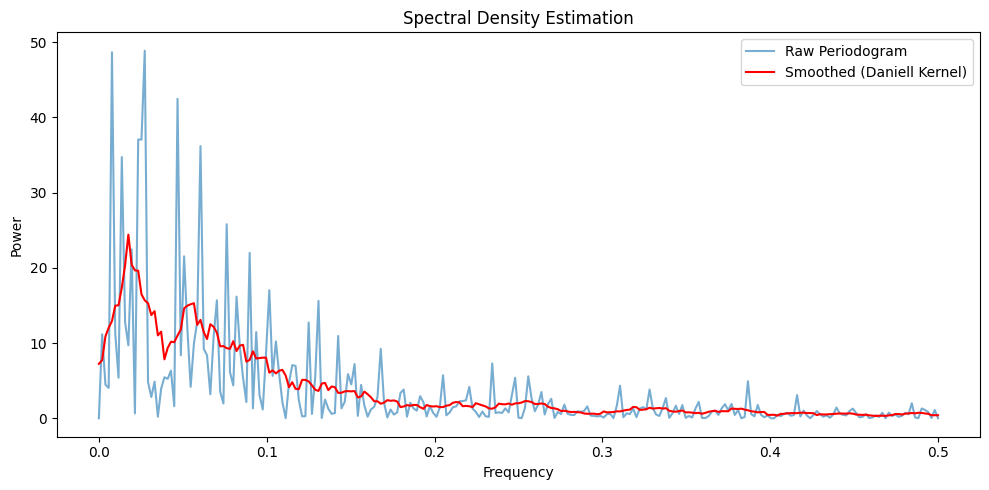

In [13]:
# Plot raw and smoothed periodogram
plt.figure(figsize=(10, 5))
plt.plot(frequencies, Pxx, label='Raw Periodogram', alpha=0.6)
plt.plot(frequencies, Pxx_smooth, label='Smoothed (Daniell Kernel)', color='red')
plt.title('Spectral Density Estimation')
plt.xlabel('Frequency')
plt.ylabel('Power')
plt.legend()
plt.grid(False)
plt.tight_layout()
plt.show()


In [14]:
# Simulate returns with volatility clustering
np.random.seed(123)
returns = np.random.normal(0, 1, 1000)
for i in range(1, 1000):
    returns[i] += 0.5 * returns[i - 1]  # induce some autocorrelation

In [15]:
# Fit GARCH(1,1) model
model = arch_model(returns, vol='Garch', p=1, q=1)
res = model.fit(disp='off')

# Print model summary
print(res.summary())

                     Constant Mean - GARCH Model Results                      
Dep. Variable:                      y   R-squared:                       0.000
Mean Model:             Constant Mean   Adj. R-squared:                  0.000
Vol Model:                      GARCH   Log-Likelihood:               -1549.50
Distribution:                  Normal   AIC:                           3107.01
Method:            Maximum Likelihood   BIC:                           3126.64
                                        No. Observations:                 1000
Date:                Tue, Jun 17 2025   Df Residuals:                      999
Time:                        14:33:09   Df Model:                            1
                                Mean Model                                
                 coef    std err          t      P>|t|    95.0% Conf. Int.
--------------------------------------------------------------------------
mu            -0.0651  4.288e-02     -1.518      0.129 [ -0.149,

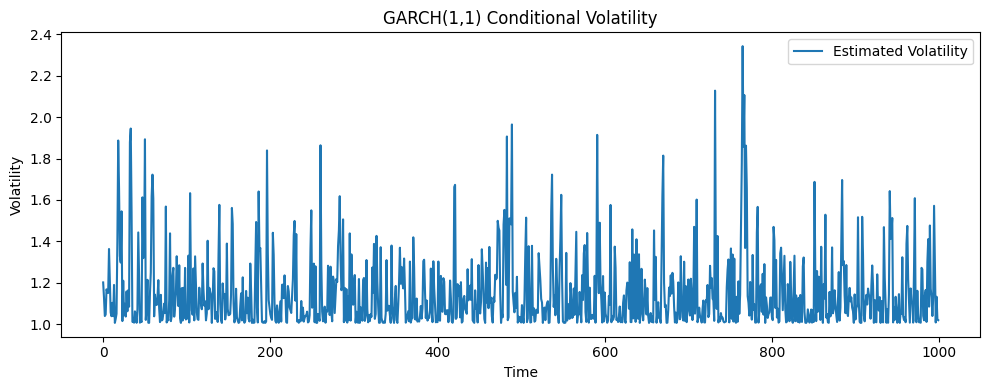

In [17]:
# Plot volatility
plt.figure(figsize=(10, 4))
plt.plot(res.conditional_volatility, label='Estimated Volatility')
plt.title('GARCH(1,1) Conditional Volatility')
plt.xlabel('Time')
plt.ylabel('Volatility')
plt.grid(False)
plt.legend()
plt.tight_layout()
plt.show()


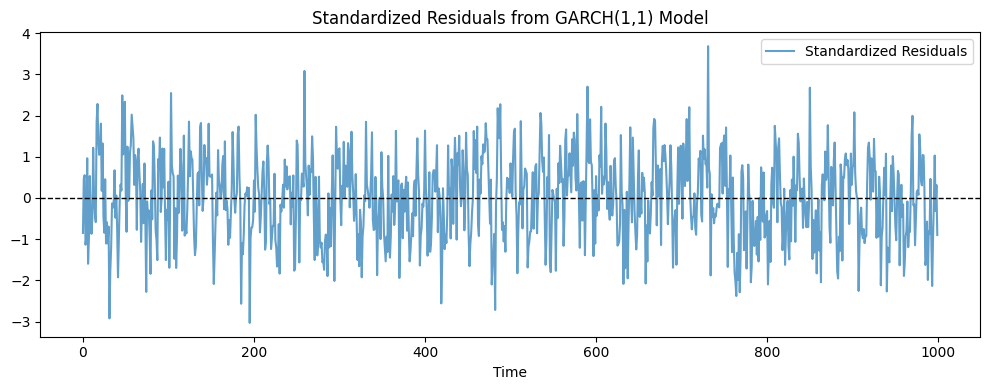

In [18]:
# Plot standardized residuals
plt.figure(figsize=(10, 4))
plt.plot(res.std_resid, label='Standardized Residuals', alpha=0.7)
plt.axhline(0, color='black', linestyle='--', linewidth=1)
plt.title('Standardized Residuals from GARCH(1,1) Model')
plt.xlabel('Time')
plt.grid(False)
plt.legend()
plt.tight_layout()
plt.show()

In [19]:
# TODO Task. Fit the GARCH model and intepreate it.